In [96]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [97]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np


wavfilehelper = WavFileHelper()

audiodata = []
file_names = []
for i in range(1, 31):
    file_names.append('GOOD/'+str(i)+'.wav')

for i in range(1, 31):
    file_names.append('BAD/B'+str(i)+'.wav')
    

for element in file_names:
    data = wavfilehelper.read_file_properties(element)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [98]:
#audiodf.head()

In [99]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        audio = audio[0:88200]
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [100]:
features = []
labels = []
for i in range(30):
    labels.append('Good')

for i in range(30):
    labels.append('Bad')


# Iterate through each sound file and extract the features 
for i in range(60):
    
    file_name = file_names[i]
    
    class_label = labels[i]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')


Finished feature extraction from  60  files


In [101]:
#featuresdf.head()

In [102]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 5)

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_features = 48
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
global_average_pooling2d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [113]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_features = 48
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 41, 64)        

In [114]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [115]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 41, 64)        

In [116]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
1/1 [==============================] - 1s 818ms/step - loss: 6.5601 - accuracy: 0.3542 - val_loss: 15.8404 - val_accuracy: 0.4167

Epoch 00001: val_loss improved from inf to 15.84038, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 2/72
1/1 [==============================] - 0s 387ms/step - loss: 26.5976 - accuracy: 0.5208 - val_loss: 9.9949 - val_accuracy: 0.4167

Epoch 00002: val_loss improved from 15.84038 to 9.99494, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 3/72
1/1 [==============================] - 0s 188ms/step - loss: 16.7938 - accuracy: 0.5208 - val_loss: 0.7487 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 9.99494 to 0.74868, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 4/72
1/1 [==============================] - 0s 160ms/step - loss: 3.9779 - accuracy: 0.5417 - val_loss: 6.6282 - val_accuracy: 0.5833

Epoch 00004: val_loss did not improve from 0.74868
Epoch 5/72
1/1 [=============================

1/1 [==============================] - 0s 248ms/step - loss: 1.4016 - accuracy: 0.6458 - val_loss: 1.3576 - val_accuracy: 0.5833

Epoch 00041: val_loss did not improve from 0.28975
Epoch 42/72
1/1 [==============================] - 0s 186ms/step - loss: 1.3306 - accuracy: 0.6458 - val_loss: 1.3411 - val_accuracy: 0.5833

Epoch 00042: val_loss did not improve from 0.28975
Epoch 43/72
1/1 [==============================] - 0s 210ms/step - loss: 1.1310 - accuracy: 0.6875 - val_loss: 1.2165 - val_accuracy: 0.5833

Epoch 00043: val_loss did not improve from 0.28975
Epoch 44/72
1/1 [==============================] - 0s 168ms/step - loss: 1.1676 - accuracy: 0.6458 - val_loss: 1.0004 - val_accuracy: 0.5833

Epoch 00044: val_loss did not improve from 0.28975
Epoch 45/72
1/1 [==============================] - 0s 218ms/step - loss: 0.6609 - accuracy: 0.7708 - val_loss: 0.7806 - val_accuracy: 0.5833

Epoch 00045: val_loss did not improve from 0.28975
Epoch 46/72
1/1 [==============================

In [117]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9791666865348816
Testing Accuracy:  1.0


In [118]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [119]:
# Class: Good

filename = 'GOOD/29.wav' 
print_prediction(filename)

The predicted class is: Good 

Bad 		 :  0.14289622008800506591796875000000
Good 		 :  0.85710376501083374023437500000000


In [120]:
# Class: Bad

filename = 'BAD/134.wav' 
print_prediction(filename)

The predicted class is: Bad 

Bad 		 :  0.94317132234573364257812500000000
Good 		 :  0.05682875216007232666015625000000


In [121]:
# Class: Bad

filename = 'BAD/245.wav' 
print_prediction(filename)

The predicted class is: Bad 

Bad 		 :  0.91847032308578491210937500000000
Good 		 :  0.08152968436479568481445312500000


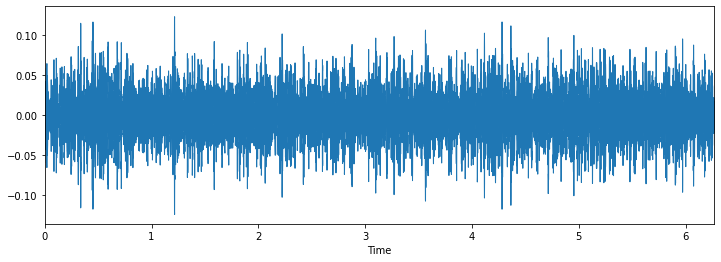

In [123]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
filename = 'BAD/245.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)